# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [88]:
import pandas as pd
import numpy as np
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except: 
    df = pd.read_csv(r'C:\Users\QWE\Documents\Проекты Яндекса\3\real_estate_data.csv', sep='\t')


df.info()

 
print('Пропуски в значениях: ','\n','\n', df.isna().sum())
df.head(12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

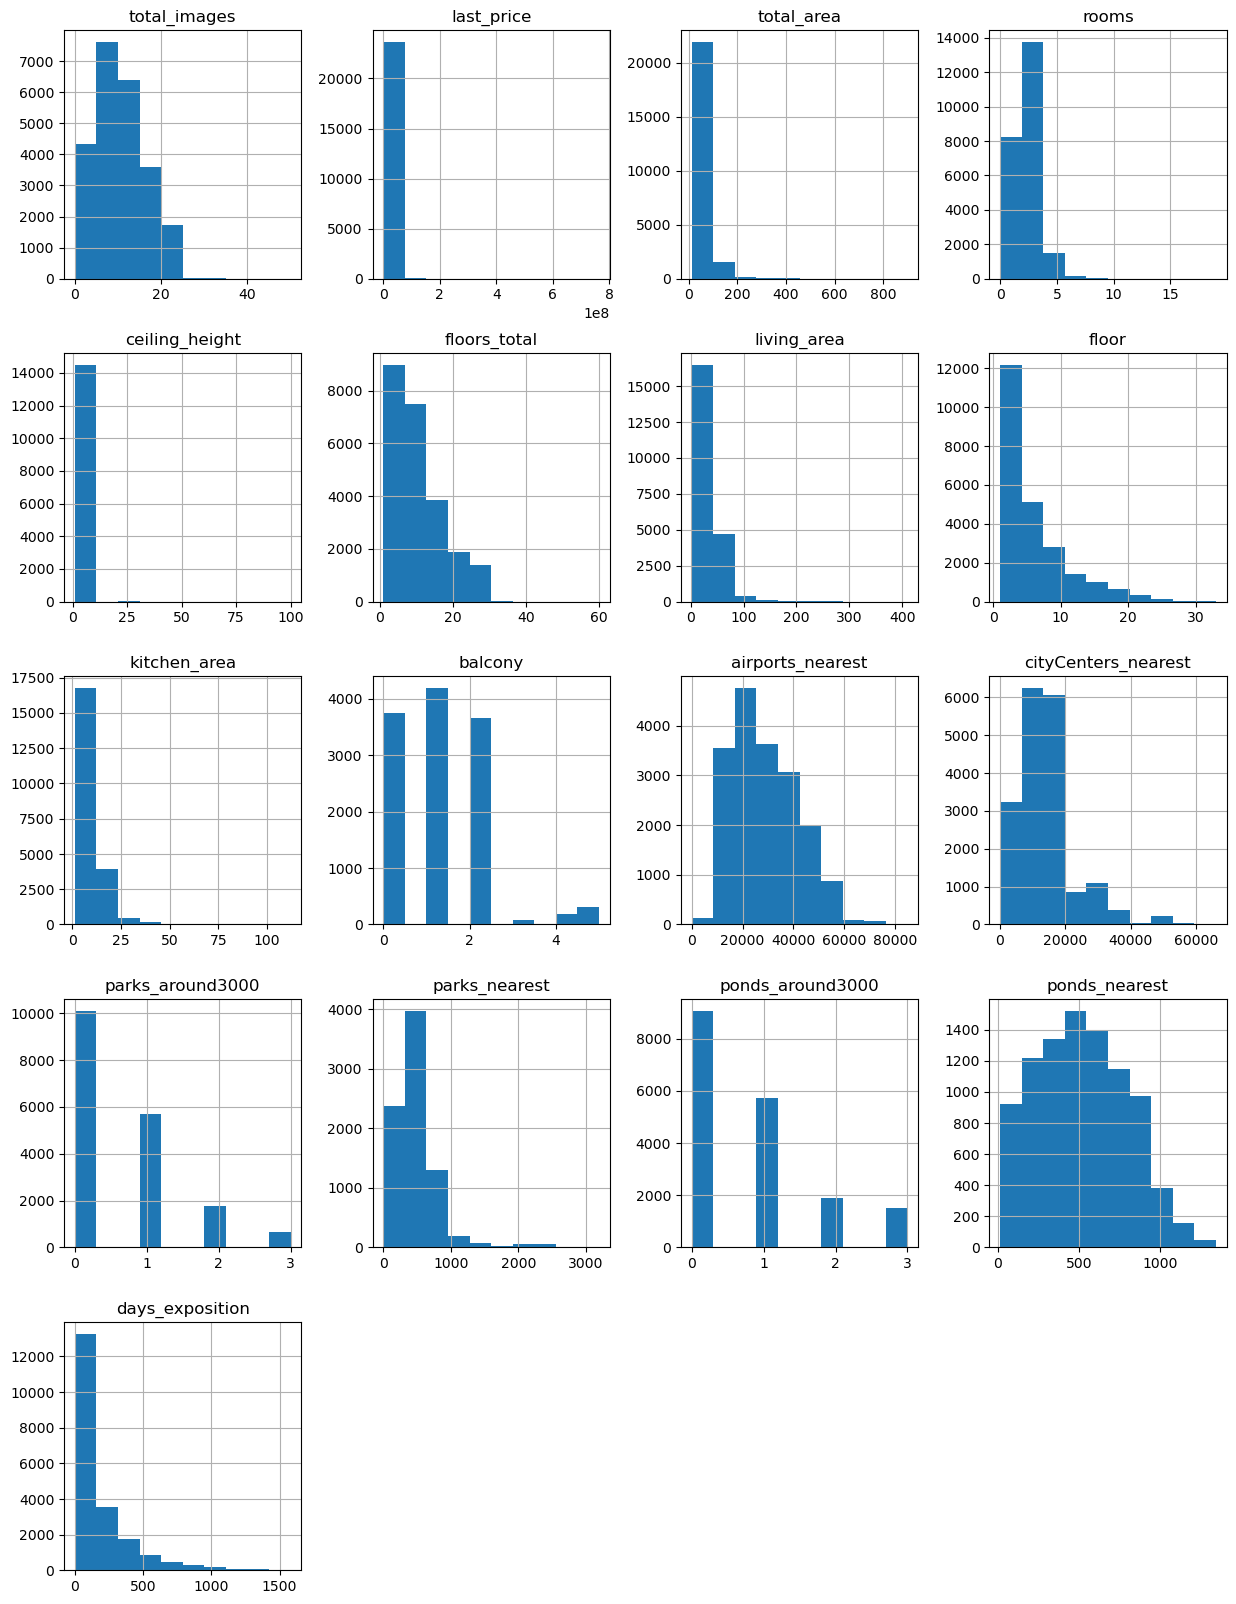

In [89]:
df.hist(figsize=(15, 20)) #Изучаем гистограммы, смотрим частоту данных и возможные аномалии

In [90]:
df.duplicated().sum() 

0

# Предобработка данных

In [91]:
import numpy as np
df.info()
print()
print('Пропуски в значениях: ','\n','\n', df.isna().sum()) #Изучаю общую инофрмацию  и количество пропусков, типы данных 

df.head( ) 

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заменены данные в столбце balcony и is_apartment на 0 и False соответственно. Там где нет данных про аппартаментов, логично что объект не является аппартаментами.
Пропуск в высоте потолков заменены на медианые

In [92]:
import warnings

warnings.filterwarnings("ignore")

df['balcony'] = df['balcony'].fillna(0) #Меняем Nan на 0 - т.е. балконов в квартире нет
df['is_apartment'] = df['is_apartment'].fillna(False) #Тип данных оставляю такой же, можно менять на 0\1, но считаю пока это лишним


 
# Меняем высоту потолков на среднее значение высоты потолков относительно локации
for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'ceiling_height'].median()
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == locality_name), 'ceiling_height'] = median
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

df.head( ) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [93]:
 df.isna().sum() # Проверяем что пропуски в балконах, апартаментах и высотах потолка равны 0 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

1. Пропуски в остальных столбцах незначительные. Незаполненые floors total, living area, kitchen area, т.к. при размещении объявлений возможно нет данных под рукой, которые есть в документах на квартиру или объявление размещает агент. А также бывает что, в объявлении указана планировка квартиры в виде фото, на которой есть разметка с данными и человек просто не заполняет графы в объявлении. 
2. Пропуски в airports_nearest, cityCenters_nearest (нет данных до ближ города), parks_around3000, parks_nearest, ponds_around3000, ponds_nearest можно заменить на 0. Будем считать, что признак как таковой отсутсвует вообще. 0 -нет парков, прудов, аэропортов.
3. Данных locality_name - 49, удаляем эти строки, их оч мало
4. Пропуски в floors_total мизерные, можно приравнять к этажу
5. Пропуски в days_exposition  это непроаданные квартиры, поэтому значения нет. Не заполняем

In [94]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['living_area'] = df['living_area'].fillna(0)
df['kitchen_area'] = df['kitchen_area'].fillna(0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)
df['airports_nearest'] = df['airports_nearest'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

df.dropna(subset=['locality_name'], inplace=True)

df['floors_total'] = df['floors_total'].fillna(df['floor'])

На анализ данных в данных стоблцах пропуски не повлияют, при возникновении подозрительный данных, я проверяю строки или смотрю сами данные. 

In [95]:

df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest      23

In [96]:
df.head(10) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,0.00,9,False,...,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,0.0,0.0,0.0,0.0,0.0,0.0,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,0.00,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,0.0,0.0,0.0,0.0,0.0,0.0,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0


Предобработка данных завершена. Еще раз смотрим гистограммы после обработки значений. 

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

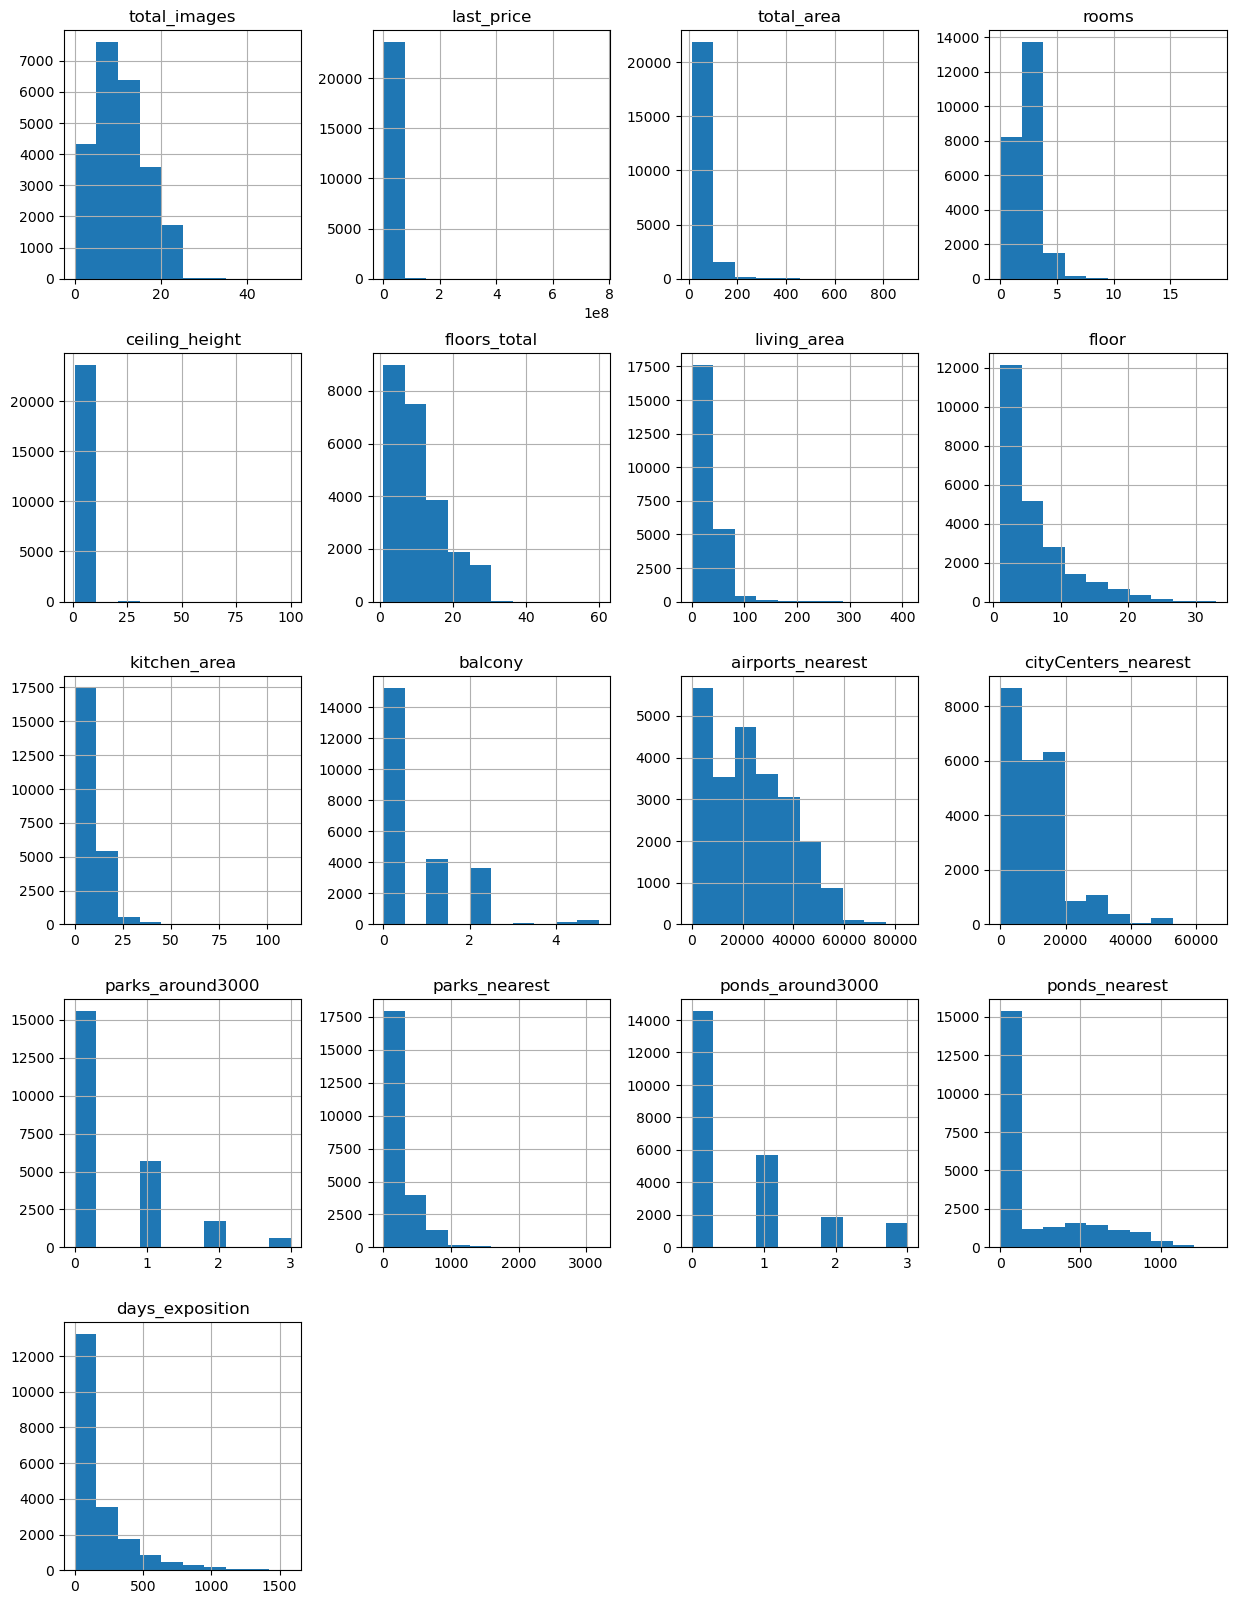

In [97]:
df.hist(figsize=(15, 20))


В стоблце "локация" есть разные форматы. 

In [98]:
df['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Меняем формат локаций на более читаемые и единый.

In [99]:
df.head(10) 
df['locality_name'] = df['locality_name'].str.replace('ё', 'е') 
df['locality_name'] = (df['locality_name']
                        .str.replace('поселок','')
                        .str.replace('городской','')
                        .str.replace('городского типа','')
                        .str.replace('коттеджный','')
                        .str.replace('деревня','')
                        .str.replace('садовое товарищество','')
                        .str.replace('садоводческое некоммерческое товарищество ','')
                        .str.replace('село','')
                        .str.replace('при железнодорожной станции','')
                       
                        )
df['locality_name'].unique()

array(['Санкт-Петербург', ' Шушары', '  Янино-1', ' Парголово', ' Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', ' Кудрово',
       'Коммунар', 'Колпино', '  Красный Бор', 'Гатчина', ' Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', ' Новое Девяткино',
       ' Металлострой', '  Лебяжье', '  Сиверский', ' Молодцово',
       '  Кузьмоловский', ' Новая Ропша', 'Павловск', ' Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       ' Куттузи', ' Аннино', '  Ефимовский', ' Плодовое', ' Заклинье',
       ' Торковичи', ' Первомайское', 'Красное Село', ' Понтонный',
       'Сясьстрой', ' Старая', ' Лесколово', ' Новый Свет', 'Сланцы',
       ' Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', ' Оржицы', ' Кальтино', 'Кудрово',
       ' Романовка', ' Бугры', '  Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', ' Павлово', ' Оредеж', ' Копорье', ' Молодежное',
       'Тихвин', ' П

In [100]:
df.head(10) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.60,1,False,...,11.00,2.0,Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,0.00,9,False,...,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,Янино-1,0.0,0.0,0.0,0.0,0.0,0.0,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.60,6,False,...,14.40,1.0,Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,0.00,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,Мурино,0.0,0.0,0.0,0.0,0.0,0.0,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0


In [101]:
df['meter_price'] = (df['last_price'] / df['total_area']).round(2) #Цена одного квадратного метра
df.head(4)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,False,...,2.0,Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,0.0,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10


In [102]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #Меняем формат
df['dayweek'] = df['first_day_exposition'].dt.weekday #Добавляем день недели
df['month'] = df['first_day_exposition'].dt.month #Добавляем месяц
df['year'] = df['first_day_exposition'].dt.year #Добавляем месяц
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,dayweek,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,...,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,0.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


In [103]:
df['floor_type'] = ''
df.loc[df['floor']==1, 'floor_type'] = 'первый'
df.loc[df['floor']==df['floors_total'], 'floor_type'] = 'последний'
df['floor_type'] = df['floor_type'].replace('','Другой')
df['floor_type'].unique() #№Ура. Заработало и проверяем значения 
 
 

array(['Другой', 'первый', 'последний'], dtype=object)

In [104]:
df['city_in_km'] = ((df['cityCenters_nearest'] / 1000).round().astype('int64'))
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,dayweek,month,year,floor_type,city_in_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,Другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,...,0.0,0.0,0.0,81.0,82920.79,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,Другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,0.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,Другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,Другой,8


### Проведите исследовательский анализ данных

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


<Axes: >

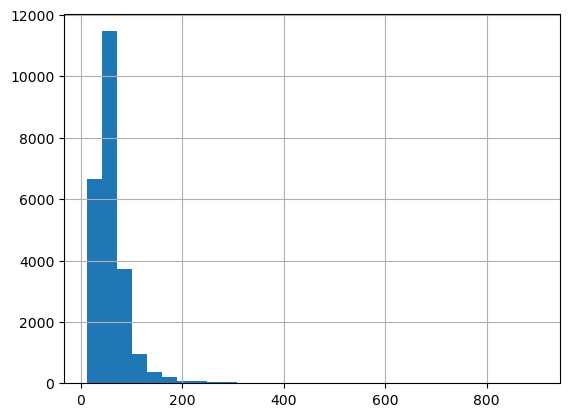

In [105]:
print(df['total_area'].describe())

 
df['total_area'].hist(bins=30)


Проверим, что это такое. Выборка квартир:


In [106]:
df.query('total_area <= 900').sort_values(by='total_area', ascending=True)
#Судя по данным (кол-во комнат, высота потолков, некоторые на последнем этаже - пентхаусы.) 
#Это реальные квартиры, оставляем в выборке. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,dayweek,month,year,floor_type,city_in_km
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5.0,10.0,2,False,...,886.0,2.0,45.0,200.0,200000.00,2,7,2017,Другой,1
19807,0,3800000.0,13.0,2018-07-04,1,2.70,5.0,10.0,3,False,...,592.0,3.0,27.0,9.0,292307.69,2,7,2018,Другой,1
17961,3,1400000.0,13.0,2017-12-03,1,2.60,9.0,0.0,1,False,...,0.0,1.0,185.0,410.0,107692.31,6,12,2017,первый,16
19546,3,1850000.0,13.0,2019-03-11,1,3.40,5.0,0.0,2,False,...,644.0,0.0,0.0,24.0,142307.69,0,3,2019,Другой,5
19558,2,1686000.0,13.2,2018-12-17,1,2.70,5.0,0.0,1,False,...,361.0,1.0,155.0,19.0,127727.27,0,12,2018,первый,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,767.0,0.0,0.0,14.0,110169.49,3,2,2019,Другой,5
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,0.0,2.0,198.0,111.0,485436.89,0,12,2017,Другой,5
3117,19,140000000.0,631.0,2019-03-30,7,2.70,5.0,0.0,5,False,...,0.0,2.0,210.0,NaN,221870.05,5,3,2019,последний,5
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,...,0.0,2.0,210.0,NaN,221799.75,1,4,2019,последний,5


Вывод: у нас есть объекты недвижимости от небольших студиий 12 метров и до 900 кв.м. (пентхаусов). К выбросам или аномалиям в данном случае субъекты не относятся, это раельные объекты недвжимости. Их доля очень маленькая в целом от выборки и рынка. <1%
Среднее количество кв. м. за отчетный период - 60 кв.м. 

In [107]:
df.query('last_price < 100000') #Есть ошибочное объявление, с неправильной ценой, удаляем его
df = df.query('last_price > 100000')

count    23649.000000
mean        31.683734
std         23.114942
min          0.000000
25%         17.800000
50%         29.000000
75%         41.050000
max        409.700000
Name: living_area, dtype: float64


<Axes: >

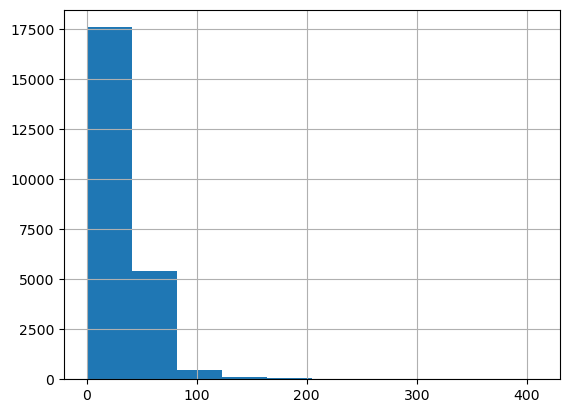

In [108]:
print(df['living_area'].describe())
df['living_area'].hist()

Вывод: Большая часть имеет жилую площадь в квартире меньше 42 кв.м., это нормально. В квартире жилая площадь только в комнатах. Коридоры, ванные, балконы, кухня - это нежилая площадь. 

In [109]:
df.query('300 < total_area <= 900').sort_values(by='total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,dayweek,month,year,floor_type,city_in_km
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,0.0,2.0,318.0,106.0,466666.67,2,12,2017,последний,8
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,...,0.0,2.0,210.0,NaN,221799.75,1,4,2019,последний,5
3117,19,140000000.0,631.0,2019-03-30,7,2.70,5.0,0.0,5,False,...,0.0,2.0,210.0,NaN,221870.05,5,3,2019,последний,5
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,0.0,2.0,198.0,111.0,485436.89,0,12,2017,Другой,5
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,767.0,0.0,0.0,14.0,110169.49,3,2,2019,Другой,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,20,135000000.0,310.0,2018-05-22,4,3.30,5.0,250.0,2,False,...,295.0,3.0,190.0,342.0,435483.87,1,5,2018,Другой,7
13397,14,19500000.0,309.7,2016-02-03,9,2.70,5.0,199.0,5,False,...,352.0,0.0,0.0,468.0,62964.16,2,2,2016,последний,10
7543,20,130000000.0,307.8,2016-04-24,5,2.70,4.0,187.9,3,False,...,0.0,1.0,603.0,1094.0,422352.18,6,4,2016,Другой,5
2243,9,130278280.0,304.0,2015-07-24,5,3.11,9.0,0.0,7,False,...,164.0,0.0,0.0,599.0,428546.97,4,7,2015,Другой,6


count    23649.000000
mean         9.551345
std          6.413619
min          0.000000
25%          6.300000
50%          9.000000
75%         11.420000
max        112.000000
Name: kitchen_area, dtype: float64


<Axes: >

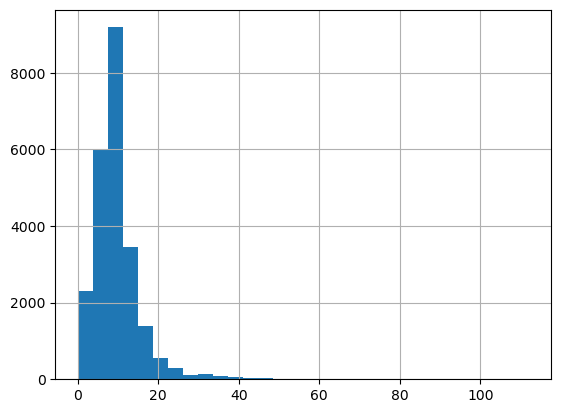

In [110]:
print(df['kitchen_area'].describe())

 
df['kitchen_area'].hist(bins=30)


In [111]:
df.query('kitchen_area < 8').sort_values(by='kitchen_area').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,dayweek,month,year,floor_type,city_in_km
3,0,64900000.0,159.00,2015-07-24,3,2.7,14.0,0.00,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,Другой,7
11173,12,4700000.0,45.00,2018-05-18,1,2.7,10.0,0.00,7,False,...,0.0,0.0,0.0,89.0,104444.44,4,5,2018,Другой,12
11179,8,3676365.0,33.00,2018-07-23,1,3.0,4.0,27.06,1,True,...,0.0,1.0,792.0,NaN,111405.00,0,7,2018,первый,21
11188,5,3600000.0,28.90,2016-06-26,1,2.7,9.0,17.00,3,False,...,0.0,0.0,0.0,33.0,124567.47,6,6,2016,Другой,10
11214,10,3724812.0,32.76,2018-10-10,1,2.7,5.0,15.00,3,False,...,400.0,1.0,492.0,136.0,113700.00,2,10,2018,Другой,26


count    2.364900e+04
mean     6.541403e+06
std      1.089655e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<Axes: >

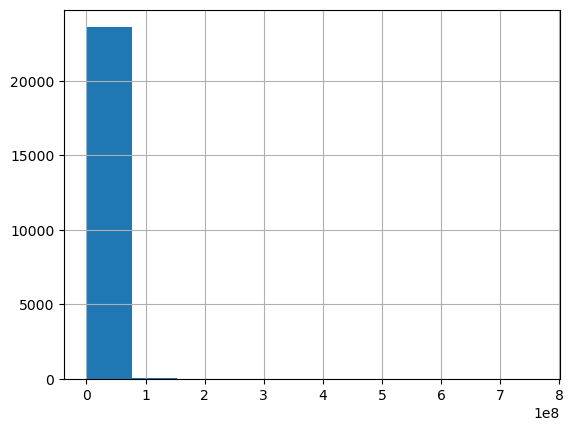

In [112]:
print(df['last_price'].describe())
df['last_price'].hist()

In [113]:
#Проверим большие значения по цене
df.query('last_price <= 7.630000e+08').sort_values(by='last_price', ascending=False).head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,dayweek,month,year,floor_type,city_in_km
12971,19,763000000.0,400.0,2017-09-30,7,2.70,10.0,250.0,10,False,...,530.0,3.0,756.0,33.0,1907500.00,5,9,2017,последний,4
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,0.0,2.0,318.0,106.0,466666.67,2,12,2017,последний,8
14706,15,401300000.0,401.0,2016-02-20,5,2.70,9.0,204.0,9,False,...,545.0,1.0,478.0,393.0,1000748.13,5,2,2016,последний,2
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,...,519.0,3.0,285.0,233.0,1736842.11,2,4,2018,Другой,1
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,0.0,2.0,198.0,111.0,485436.89,0,12,2017,Другой,5
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,...,386.0,3.0,188.0,NaN,1542604.80,1,3,2019,последний,1
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,...,400.0,3.0,140.0,249.0,857542.88,0,4,2017,Другой,6
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,...,0.0,2.0,198.0,199.0,585365.85,5,4,2017,последний,5
5893,3,230000000.0,500.0,2017-05-31,6,2.70,7.0,0.0,7,False,...,0.0,2.0,198.0,50.0,460000.00,2,5,2017,последний,5
8900,13,190870000.0,268.0,2016-03-25,3,2.70,8.0,132.0,7,False,...,0.0,2.0,198.0,901.0,712201.49,4,3,2016,Другой,5


Данные как они есть, учитываем что квартиры имеют разный ремонт, а не только статистические данные. На цену влияет многое.
Просто убедились, что все в порядке. И к нам не попали аномальные квартиры с одной комнатой за почти максимальную цену. 

count    23649.000000
mean         2.733775
std          1.010394
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Выборка:  
 count    23620.000000
mean         2.704618
std          0.236723
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64


<Axes: >

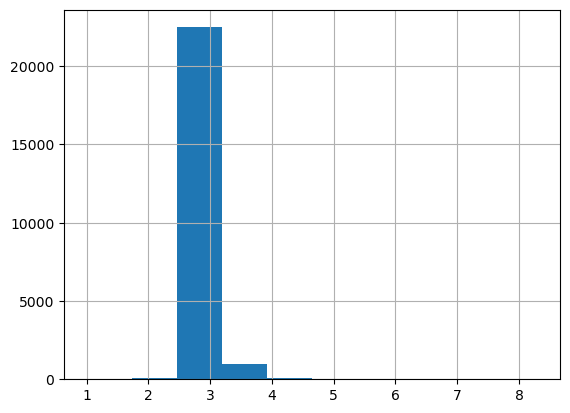

In [114]:
print(df['ceiling_height'].describe()) #Убираем "выбросы" квартир с потолками выше 8 метров, стало меньше на 29 квартиры. 
                                        #Такие данные скорее всего ошибочные, доля их мизерная, убираем.
                                        #Квартиры с потолками до 10 м - пентхаусы и двухуровневые
print()
print('Выборка: ' , '\n', df.query('ceiling_height < 10')['ceiling_height'].describe())
df = df.query('ceiling_height < 10')
df['ceiling_height'].hist()

Большинство квартир имеет высоту потолков около 2.7 метров. Что выше, уже "лучше рынка". Лишние данные отсекли как аномальные 
ошибочные при вводе объявлений. 

In [115]:
df.query('ceiling_height < 2.30')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,dayweek,month,year,floor_type,city_in_km
552,11,2999000.0,33.50,2017-03-30,1,2.00,15.0,17.500000,6,False,...,520.0,1.0,949.0,270.0,89522.39,3,3,2017,Другой,12
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5.0,40.000000,4,False,...,0.0,0.0,0.0,NaN,38709.68,3,12,2018,Другой,0
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18.0,16.600000,9,False,...,0.0,0.0,0.0,36.0,59836.30,0,12,2017,Другой,0
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2.0,27.500000,1,False,...,0.0,0.0,0.0,248.0,35046.73,0,8,2017,первый,0
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5.0,0.000000,5,False,...,0.0,0.0,0.0,100.0,46478.87,1,5,2018,последний,0
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17.0,15.200000,12,False,...,0.0,0.0,0.0,53.0,91666.67,6,6,2017,Другой,27
12755,2,1400000.0,22.50,2017-09-21,1,2.20,2.0,18.000000,2,False,...,0.0,0.0,0.0,45.0,62222.22,3,9,2017,последний,0
16446,6,12300000.0,88.30,2019-03-12,3,2.00,5.0,63.900000,2,False,...,568.0,1.0,154.0,NaN,139297.85,1,3,2019,Другой,8
16884,0,1500000.0,33.00,2018-10-03,1,2.00,5.0,20.000000,5,False,...,0.0,0.0,0.0,6.0,45454.55,2,10,2018,последний,0
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37.0,17.400000,5,False,...,0.0,3.0,80.0,71.0,102500.00,1,10,2017,Другой,20


In [116]:
df = df.query('ceiling_height >= 2.3')

count    23604.000000
mean         2.070539
std          1.078999
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


<Axes: >

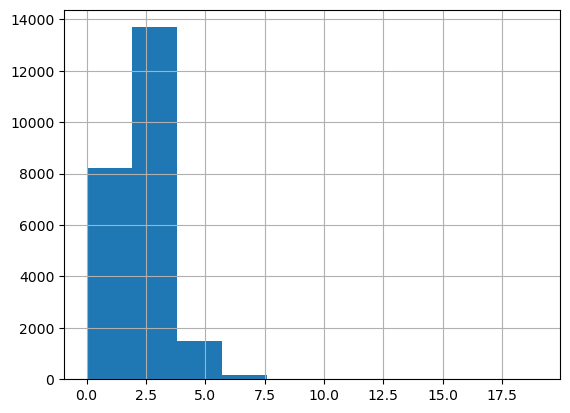

In [117]:
print(df['rooms'].describe())
df['rooms'].hist()

In [118]:
df.query('rooms <= 16').sort_values(by='rooms', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,dayweek,month,year,floor_type,city_in_km
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,...,516.0,0.0,0.0,1365.0,105555.56,0,3,2015,последний,4
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,767.0,0.0,0.0,14.0,110169.49,3,2,2019,Другой,5
20829,6,28659000.0,245.4,2016-03-31,14,2.70,4.0,168.3,2,False,...,541.0,2.0,118.0,95.0,116784.84,3,3,2016,Другой,2
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,0.0,2.0,435.0,418.0,68870.52,5,12,2017,Другой,8
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,0.0,2.0,318.0,106.0,466666.67,2,12,2017,последний,8
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,...,686.0,2.0,66.0,813.0,170015.46,1,2,2017,Другой,1
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,...,0.0,0.0,0.0,NaN,95264.02,6,7,2018,последний,3
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,False,...,368.0,0.0,0.0,11.0,71726.05,0,7,2016,Другой,5
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,False,...,316.0,1.0,227.0,77.0,137931.03,1,6,2016,последний,5
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,False,...,191.0,1.0,531.0,NaN,84372.71,3,1,2018,последний,12


Вывод: Среднее количество комнат 2-3. Максимальное 16, больша вероятность, что это коммунальные квартиры. После или без ремонта. 
Бывают даже целые инвестиционные проекты в таких домах 

count    23604.000000
mean         5.893704
std          4.882400
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


<Axes: >

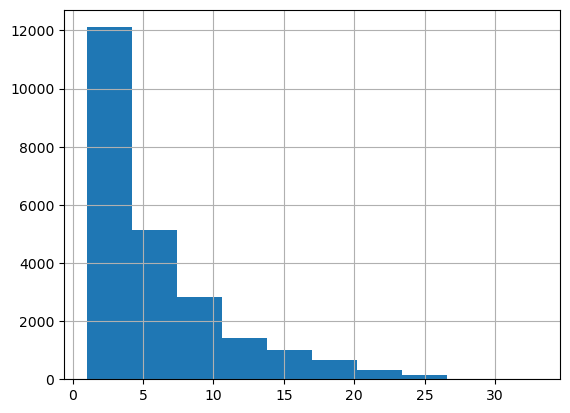

In [119]:
print(df['floor'].describe()) 
df['floor'].hist()

Большинство квартиры до 8 этажа. Считается что, чем выше тем дороже, но это зависит также куда окна выходят -
на шоссе или парк, возможно реку. А может и в соседней дом через 5-10 метров от здания. 


count      23604
unique         3
top       Другой
freq       17295
Name: floor_type, dtype: object

floor_type
Другой       17295
последний     3430
первый        2879
Name: count, dtype: int64


<Axes: >

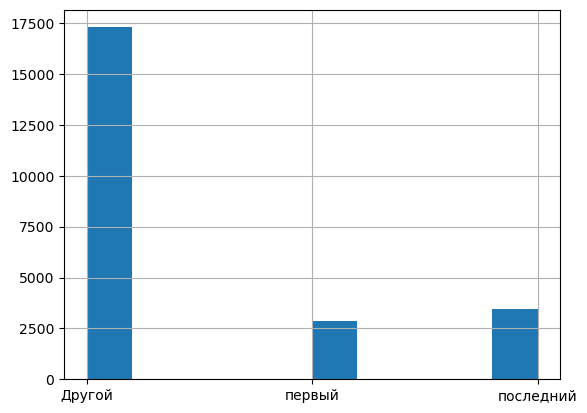

In [120]:
print(df['floor_type'].describe() )
print()
print(df['floor_type'].value_counts())
df['floor_type'].hist()

Вывод. ~12% на первых этажах и ~19% на последних. 

count    23604.000000
mean        10.675987
std          6.589192
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


<Axes: >

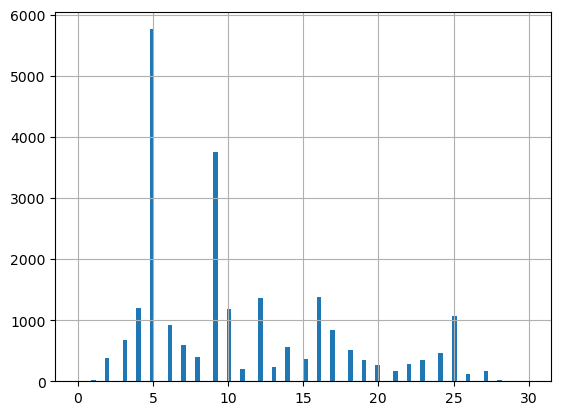

In [121]:
print(df['floors_total'].describe())
df['floors_total'].hist(bins=100, range=(0,30))

Вывод. В Санкт-Петербурге низкоэтажная и среднеэтажная застройка преимущественно. Но до 60 этажа тоже уже строят  - 
небоскребы и башни.

count    23604.000000
mean     10897.557533
std       9633.722040
min          0.000000
25%       2255.500000
50%      11266.000000
75%      15254.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


<Axes: >

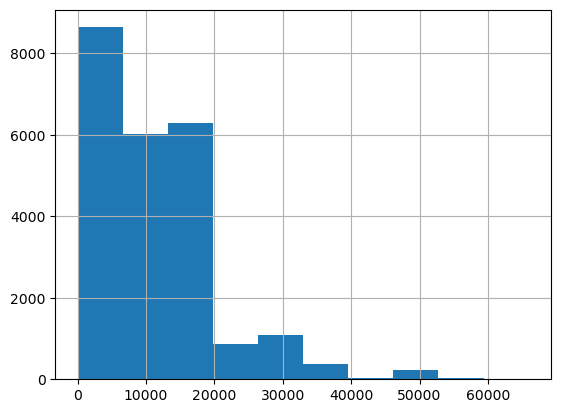

In [122]:
print(df['cityCenters_nearest'].describe())
df['cityCenters_nearest'].hist()

Вывод. 75% значений до 15 км, относительно недалеко до центра города. Остальные на окраине или в пригороде - в Лениградской области. 

count    23604.000000
mean     22079.533215
std      16458.398182
min          0.000000
25%      10254.000000
50%      21875.000000
75%      34392.000000
max      84869.000000
Name: airports_nearest, dtype: float64


<Axes: >

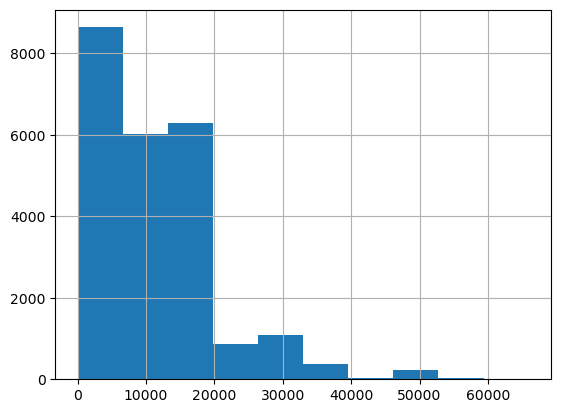

In [123]:
print(df['airports_nearest'].describe())
df['cityCenters_nearest'].hist()

Большинство объвялений на расстоянии до 35 км от аэропорта. Неудивительно, от Пулково до центра города 22 км.  

count    23604.000000
mean       167.426114
std        306.931578
min          0.000000
25%          0.000000
50%          0.000000
75%        301.250000
max       3190.000000
Name: parks_nearest, dtype: float64


<Axes: >

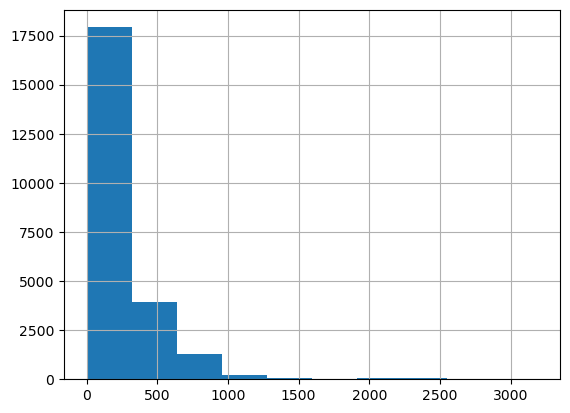

In [124]:
print(df['parks_nearest'].describe())
df['parks_nearest'].hist()

Большинство объявлений, что имеют парки рядом, находятся от них на расстоянии до 300 м. Реже 300-500. И выше до 3 км 
их немного. Но парк в 3 км - сомнительный бонус к квартире. Часто такие нюансы не указывают в объявлении.

count    23604.000000
mean         2.568844
std          1.788849
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: dayweek, dtype: float64


<Axes: >

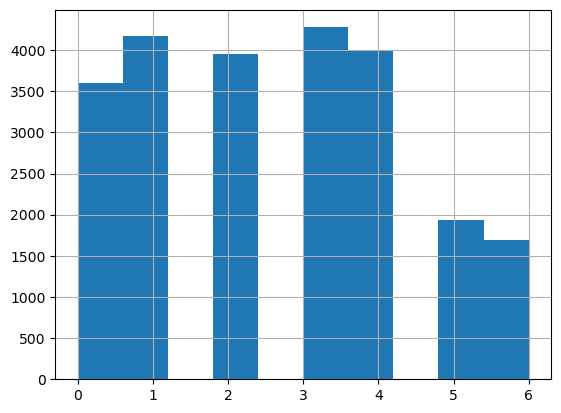

In [125]:
print(df['dayweek'].describe())
df['dayweek'].hist()

Наиболее активно размешаются объвяления в будни - во вторник и в среду. В понедельник меньше. А в субботу и воскрсенье меньше 
всего. 

count    23604.000000
mean         6.401373
std          3.491447
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


<Axes: >

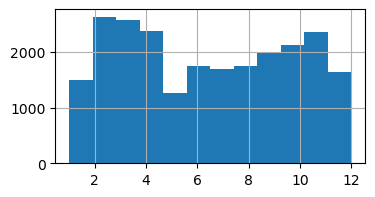

In [126]:
print(df['month'].describe())
df['month'].hist(bins=12, figsize=[4,2]  )

По месяцам вижно что самые активные месяца это февраль-март-апрель. В апреле и мае спрос падает, но потом 
восстанавливается до декабря.

count    23604.000000
mean      2017.369514
std          1.037922
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64


<Axes: >

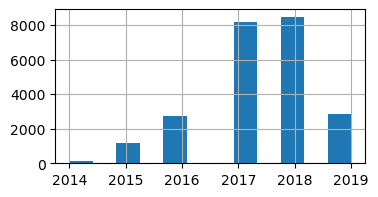

In [127]:
print(df['year'].describe())
df['year'].hist(bins=12, figsize=[4,2]  ) 

<Axes: xlabel='last_price', ylabel='year'>

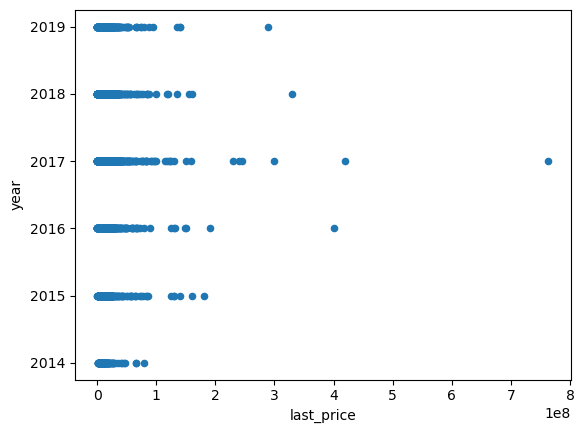

In [128]:
 df.plot(x='last_price', y='year', kind='scatter')

Видно, что 2017 и 2018 года недвижмость буквально ставила рекорды. Скорее всего это связано с инфляцией и с переоценкой стоимости жилья и накомпелния эффекта покупки - люда готовы были продать когда то купленное жилье. Чтобы переехать в новое. 
Плюс, что имеет огромнюу роль до сих пор, ввели материнские капиталы и льготные ставки по ипотеке. После кризиса в 2014 году рынок восстаналвивался, а дальше врызвными темпами увеличивался, и только в 2019 пошел на спад.


Медиана продолжительности продажи составляет:  95.0

Средняя продолжительность продажи объекта недвижмости: 180.7317097026604


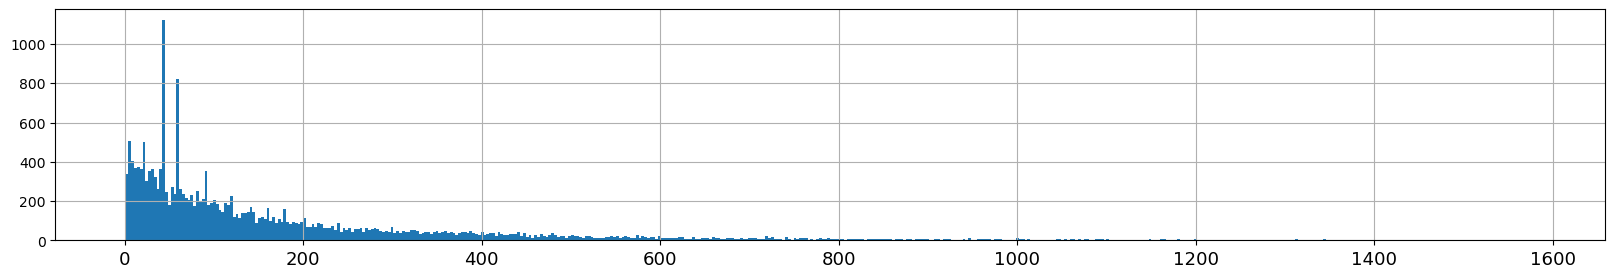

In [129]:
 # NaN значит объект так и не продался, возможно продался на другой плоащдке и объявление закрыли 
srednee = (df['days_exposition'].sum() / 20448 ) #сумма столбца / на количество заполненных строк из info
print('Медиана продолжительности продажи составляет: ', df['days_exposition'].median())
df['days_exposition'].hist(bins=500, figsize=[20, 3], xlabelsize = 13 )
print()
print('Средняя продолжительность продажи объекта недвижмости:', srednee)

Квартиры висят часто в продаже с прошлого года и переходят на следующий. Обычно продажа составляет в среднем 180 дней. Медианое значение 95 дней показывает фактическое число все таки ближе данным. Среднее число искажено из за долгих продаж, скорее всего это возможно это какие-то неликвидные квартиры, с плохим ремонтом, метоположением, обустройством ЖК, которые могут продаватся годами.
Быстрые продажи до 95 дней. Долгие свыше 180. Необычайно долгие >400



In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23604 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23604 non-null  int64         
 1   last_price            23604 non-null  float64       
 2   total_area            23604 non-null  float64       
 3   first_day_exposition  23604 non-null  datetime64[ns]
 4   rooms                 23604 non-null  int64         
 5   ceiling_height        23604 non-null  float64       
 6   floors_total          23604 non-null  float64       
 7   living_area           23604 non-null  float64       
 8   floor                 23604 non-null  int64         
 9   is_apartment          23604 non-null  bool          
 10  studio                23604 non-null  bool          
 11  open_plan             23604 non-null  bool          
 12  kitchen_area          23604 non-null  float64       
 13  balcony              

<Axes: xlabel='total_area'>

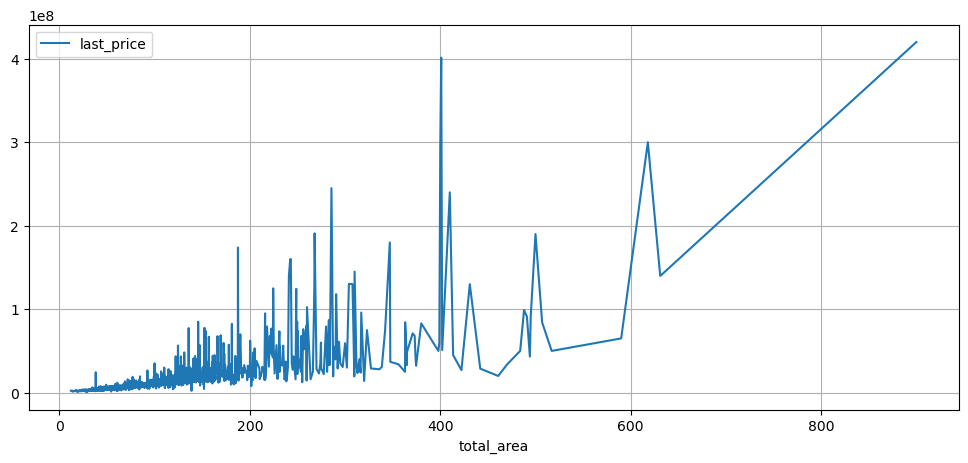

In [131]:
df.pivot_table(index='total_area', values='last_price', ).plot(grid=True, figsize=(12, 5))


<Axes: xlabel='last_price', ylabel='total_area'>

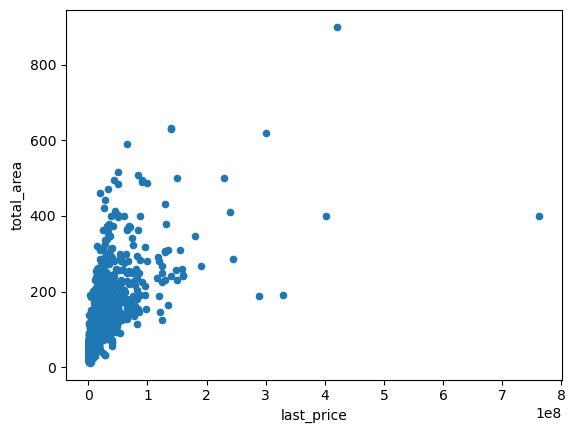

In [132]:
df.plot(x='last_price', y='total_area', kind='scatter')

In [133]:
df['last_price'].corr(df['total_area'])

0.6538712393648303

Цена напрямую влияет на стоимость, у есть оч дорогие квартиры и большие по площади. Можно сказать что чем больше площадь, тем выше цена, но цена также завсит и от других факторов. Класс дома, качество ремонта, местоположения итд.

<Axes: xlabel='living_area'>

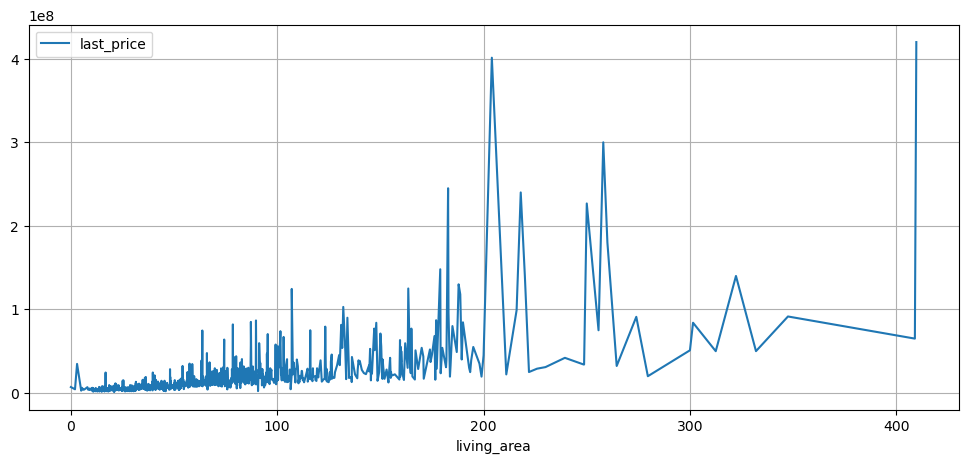

In [134]:
df.pivot_table(index='living_area', values='last_price' ,).plot(grid=True, figsize=(12, 5))

<Axes: xlabel='last_price', ylabel='living_area'>

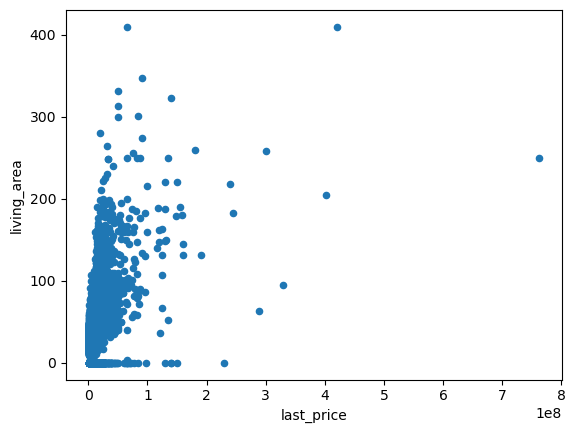

In [135]:
df.plot(x='last_price', y='living_area', kind='scatter')

In [136]:
df['last_price'].corr(df['living_area'])

0.4909500596577582

С жилой площадью как и с общей площадью тоже наблюдается прямая зависимость. 

<Axes: xlabel='kitchen_area'>

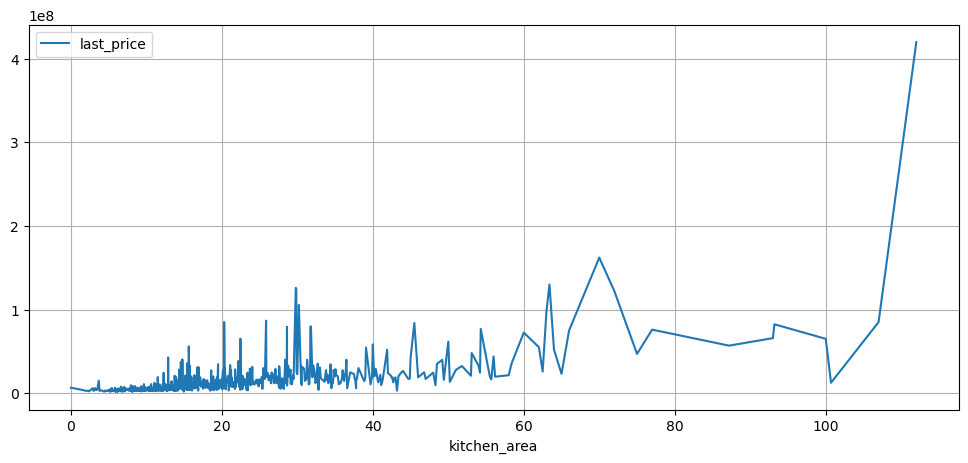

In [137]:
df.pivot_table(index='kitchen_area', values='last_price' ,).plot(grid=True, figsize=(12, 5))

<Axes: xlabel='last_price', ylabel='kitchen_area'>

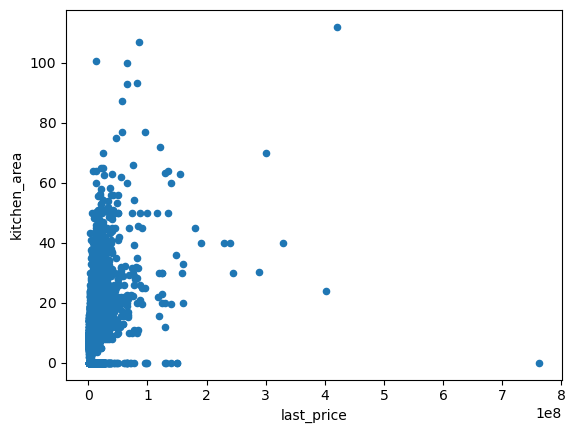

In [138]:
df.plot(x='last_price', y='kitchen_area', kind='scatter')

In [139]:
df['last_price'].corr(df['kitchen_area'])

0.3869462958788592

С кухонной площадью как и с общей площадью тоже наблюдается прямая зависимость. К тому же большие кухни >60 метрах, в очень больших квартирах соответсвенно
По графику разброса видно что большинство значений находятся в значенияъ меньше 40 метрах. 

<Axes: xlabel='rooms'>

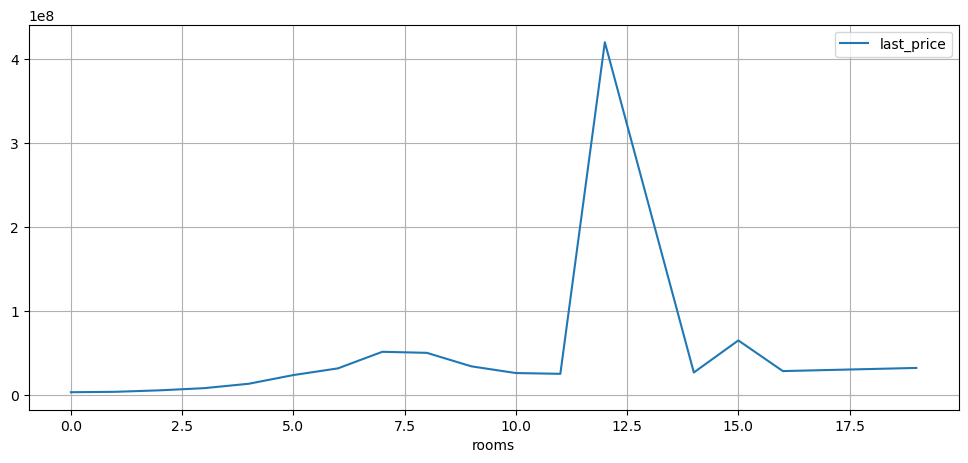

In [140]:
df.pivot_table(index='rooms', values='last_price',).plot(grid=True, figsize=(12, 5))

<Axes: xlabel='last_price', ylabel='rooms'>

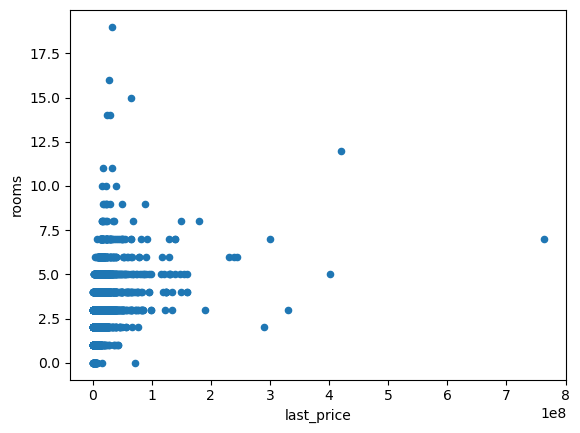

In [141]:
 df.plot(x='last_price', y='rooms', kind='scatter')

In [142]:
df['last_price'].corr(df['rooms'])

0.3635745645823461

Количес комнат у большинства - до 5 штук. Но в Питере квартиры разные, есть коммуналки, а есть и многокомнатные новостройки.
Как вывод можно сделать, что количесвто комнат влияет на цену ( но думаю это как следствие прибавления к площади общей за счет них) 

In [143]:
print(df['floor_type'].value_counts())


floor_type
Другой       17295
последний     3430
первый        2879
Name: count, dtype: int64


<Axes: xlabel='floor_type'>

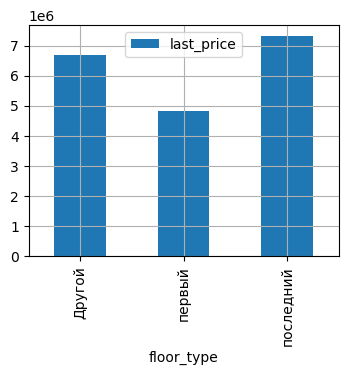

In [144]:
df.pivot_table(index='floor_type', values='last_price').plot(kind='bar', grid=True, figsize=(4, 3))


Цена на последние этажи влияет на на цену. И обратно влияет этажность на цену первый этаж. Т.е. несопоставимые по параметрам квартиры на последних этажах стоят также или дороже чем на "других" и тем более на "первых" 

<Axes: xlabel='dayweek'>

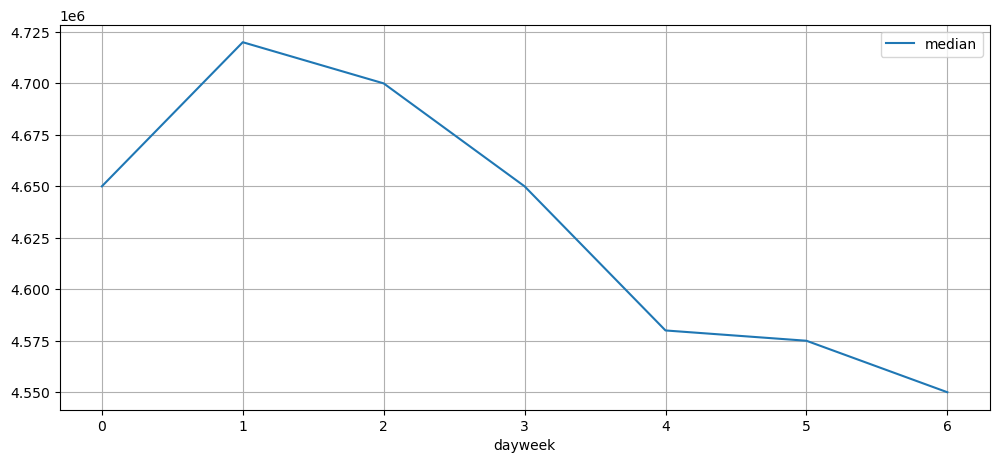

In [145]:
df.pivot_table(index='dayweek', values='last_price', aggfunc={'median'} ).plot(  grid=True, figsize=(12, 5))

Видно что самые дорогие квартиры выставлялись в субботу. Возможно совпадение, данных такого типа немного. 

<Axes: xlabel='month'>

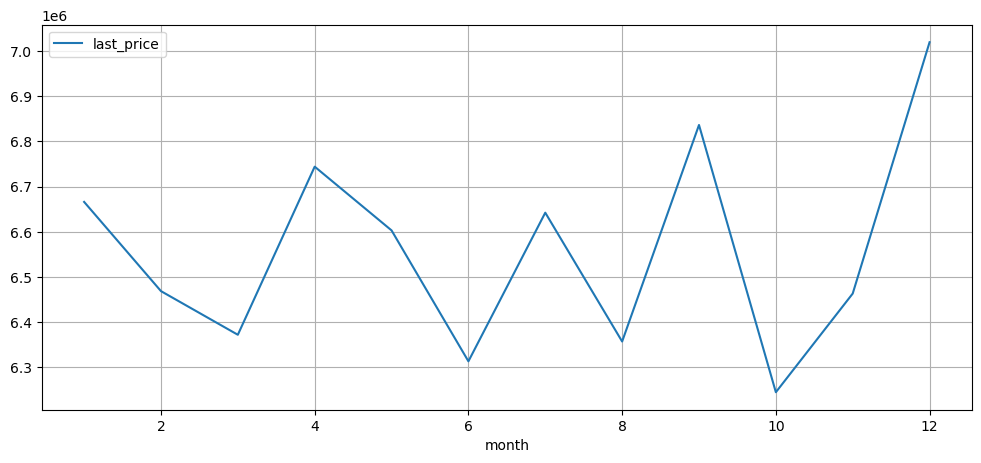

In [146]:
df.pivot_table(index='month', values='last_price').plot(  grid=True, figsize=(12, 5))

<Axes: xlabel='last_price', ylabel='month'>

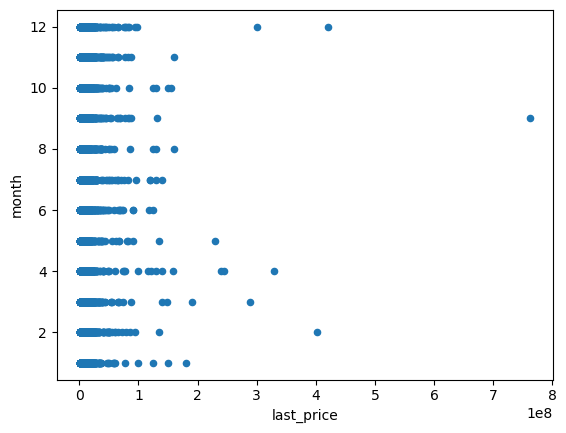

In [147]:
 df.plot(x='last_price', y='month', kind='scatter')

По графикам можно отследить ценообразование объявлений.  В течение года цены меняются в пределах рыночных значений, но к концу года, как говорят "сезон квартир" выставляются квартиры по более дорогой цене. 

<Axes: xlabel='year'>

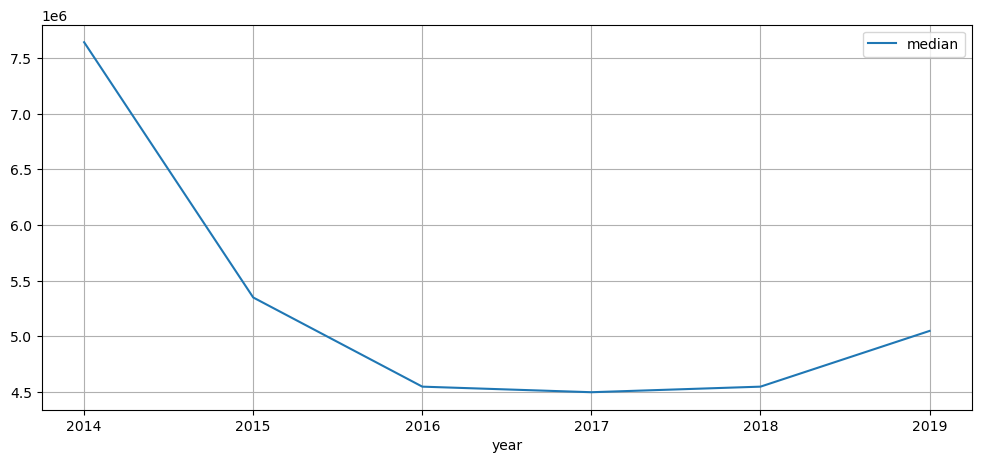

In [148]:
df.pivot_table(index='year', values='last_price', aggfunc={'median'}).plot(  grid=True, figsize=(12, 5))

In [149]:
table = df.pivot_table(index='locality_name', values='last_price', aggfunc={'mean', 'count'}).sort_values('count', ascending=False).head(10)
table['mean'] = (table['mean']/100).round(2)  
table.columns = ['Количество объявлений', 'Средняя стоимость кв. м.']
table.index.rename ('Населенный пункт', inplace=True) 
table.head(10)

,Количество объявлений,Средняя стоимость кв. м.
Населенный пункт,,
Санкт-Петербург,15701,80651.88
Мурино,554,36532.72
Шушары,440,41080.82
Всеволожск,397,37928.19
Пушкин,369,64690.36
Колпино,338,39640.21
Парголово,327,44880.75
Гатчина,306,34879.72
Кудрово,299,42341.58


Средняя стоимость кв.м.  -  в г Санкт-Петербург 80647.51 
Далее считаем стоимость км

In [150]:
df.loc[df['locality_name'] == 'Санкт-Петербург', ['locality_name', 'meter_price', 'city_in_km']].sort_values('city_in_km', ascending= False).head(50)


,locality_name,meter_price,city_in_km
12160,Санкт-Петербург,56976.74,29
11652,Санкт-Петербург,92156.86,29
16787,Санкт-Петербург,56526.81,29
10798,Санкт-Петербург,78225.81,29
19892,Санкт-Петербург,79890.31,29
13031,Санкт-Петербург,73943.66,29
814,Санкт-Петербург,68468.47,28
22916,Санкт-Петербург,80375.00,28
23145,Санкт-Петербург,68478.26,28
17798,Санкт-Петербург,70281.69,28


In [151]:
df.query('locality_name == "Санкт-Петербург" and city_in_km == 27') #Проверка на 27 км

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,dayweek,month,year,floor_type,city_in_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,1496.0,0.0,0.0,128.0,193918.92,1,11,2017,Другой,27
5961,6,2250000.0,32.0,2018-02-27,1,2.70,2.0,16.5,2,False,...,0.0,0.0,0.0,178.0,70312.50,1,2,2018,последний,27


В центре самые дорогие квартиры и с расстоянием к нему, стоимость квартиры постепенно растет. 
Но на 27 км есть всплеск роста - строка 748 скорее всего ошибочна, поэтому такое увеличение. Цена указана с ошибкой, скорее всего единица впереди лишняя, еслисравнивать со второй записью. Еще цена может варьироваться как я писал выше от ремонта, самого ЖК, т.е. комфорт, безнес класса итд. Наличие пром зоны рядом тоже сильно уменьшает цену, как и железной дороги. 

In [152]:
df2 = df.query('locality_name == "Санкт-Петербург" ')
df2.groupby('city_in_km').agg({'meter_price': ['mean']}).round(2)


,meter_price
,mean
city_in_km,
0,183690.12
1,177005.41
2,157849.01
3,121225.88
4,133319.36
5,140509.79
6,151012.19
7,156176.88


### Общий вывод

1. Много старался дать комментарием по ходу выполнения проекта, но напишу тезисно, возможно где-то буду повторятся из выводов.Данные дали нам обширное поле для творчества. Пустые значения можно обрабатывать изходя из аналогии объектов недвижмости, но не всегда. Зависит от самих данных. 
2. Рынок недвижимости рос после кризиса в 2014 году и цены росли вслед за количеством предложений. Появились квартиры совсем разного формата, до 16 комнат, и до 900 кв м пентхаусы. Для каждого на свой бюджет. Квартиры к центру Питера стоят дороже, чем дальше, но зависит от квартиры, класса жилья, местоположения, наличия пром зон рядом. 
3. Статистические выводы касательно дня недели и месяца объявлений , на мой взгляд вещь спорная, но показывают когда разного рода объявления публиковались. Причины же могут быть разными: кризисы, понижения процентной ставки, Материснкие капиталы, льготные ипотеки итд. 
4. Как показало исследование - цена напрямую зависит от общей площади и удалености от центра города. А также наличие разного рода парков, прудов тоже закладывается в цену. Чем выше квартира, тем она дороже. Многие дорогие квартиры расположены именно там, в т.ч. пентхаусы
